In [54]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
from scipy.spatial.distance import pdist, squareform
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

Populating the interactive namespace from numpy and matplotlib


In [274]:
cd /home/chenxupeng/projects/training/

/home/chenxupeng/projects/training


In [3]:
ls /BioII/lulab_b/caojingyi/project/exorbase/new_counts/matrix

chd.count.name  crc.type.ratio  hcc.type.sum       paad.count.name
chd.type.ratio  crc.type.sum    health.count.name  paad.type.ratio
chd.type.sum    hcc.count.name  health.type.ratio  paad.type.sum
crc.count.name  hcc.type.ratio  health.type.sum


## exoRBase new mapping data qc

In [42]:
table = {}
for i in tables:
    table[i] = get_table('/BioII/lulab_b/caojingyi/project/exorbase/new_counts/matrix/'+i+'.type.sum').T
wholetable_sum = pd.concat((table['chd'],table['crc'],table['hcc'],table['health'],table['paad']),axis=1)

In [53]:
table = {}
for i in tables:
    table[i] = get_table('/BioII/lulab_b/caojingyi/project/exorbase/new_counts/matrix/'+i+'.type.ratio')
wholetable_ratio = pd.concat((table['chd'],table['crc'],table['hcc'],table['health'],table['paad']),axis=1)

In [59]:
wholetable_ratio

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5679909,SRR5687235,SRR5687236,SRR5687237,SRR5687238,...,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
rRNA,0.017817,0.011846,0.016327,0.015875,0.010950,0.014048,0.046925,0.090053,0.036689,0.069082,...,0.001275,0.003630,0.001333,0.001911,0.001771,0.008114,0.004164,0.006270,0.007549,0.238334
Y_RNA,0.000724,0.000269,0.000859,0.000793,0.000823,0.001983,0.004949,0.004769,0.003189,0.004314,...,0.000111,0.000044,0.000274,0.000186,0.000411,0.000087,0.001082,0.000217,0.002949,0.005245
snRNA,0.002268,0.000686,0.002576,0.000914,0.003736,0.004521,0.006794,0.007219,0.004630,0.003346,...,0.000536,0.000655,0.000193,0.000513,0.000640,0.000758,0.000640,0.001853,0.008620,0.028253
snoRNA,0.001505,0.004030,0.003031,0.001410,0.005785,0.006407,0.038564,0.025791,0.024432,0.010229,...,0.001866,0.000588,0.000311,0.000128,0.000673,0.000776,0.001415,0.016198,0.037025,0.165927
srpRNA,0.273789,0.164675,0.270474,0.191598,0.216986,0.275929,0.237193,0.521407,0.218121,0.280262,...,0.056787,0.084092,0.033094,0.056430,0.040170,0.053513,0.074181,0.067345,0.092022,0.245441
vaultRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tRNA,0.022067,0.020433,0.041800,0.023300,0.039635,0.029498,0.072670,0.036582,0.043817,0.042598,...,0.003770,0.003330,0.002333,0.004147,0.004389,0.002292,0.003259,0.002632,0.003655,0.065994
mRNA,96.618158,97.328931,96.644200,97.032262,96.458846,97.206180,94.032850,95.796217,95.017376,96.700005,...,95.657513,97.456884,95.730234,95.759887,95.885785,98.553785,97.926129,97.714925,95.835616,92.622845
milncRNA,1.352165,1.016383,1.318309,1.157247,1.396872,0.976198,2.541244,1.522123,2.123193,1.226512,...,1.932039,1.039712,1.914094,1.897690,1.821455,0.491899,0.816138,0.864693,1.574919,2.610892
lncRNA,1.711507,1.452747,1.702423,1.576600,1.866367,1.485235,3.018811,1.995839,2.528554,1.663652,...,2.346103,1.411065,2.318134,2.279108,2.244705,0.888776,1.172991,1.325866,2.437645,4.017070


In [45]:
def plot_bar(rnaname,dataname ='hcc'):
    if dataname =='hcc':
        table = newtable_hcc
        ranges = np.arange(0,45,5)
        title = 'HCClulab'
    elif dataname =='gse':
        table = newtable_gse
        ranges = np.arange(0,210,10)
        title = 'SciReport'
    if dataname =='exo':
        table = wholetable_sum
        ranges = np.arange(0,85,10)
        title = 'ExoRBase'
    count = np.array(table[table.index ==rnaname])
    fig,ax=plt.subplots(1,figsize=(20,6))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                ~np.sort(~count).reshape(-1,1)),axis=1),columns=['sample','counts'])
    sns.barplot(x='sample',y='counts',data = counttable,color='b',alpha=0.5)

    ax.set_xticks(ranges)
    ax.set_xticklabels(ranges)
    ax.set_title('Counts of '+title+' '+rnaname,fontsize=30)

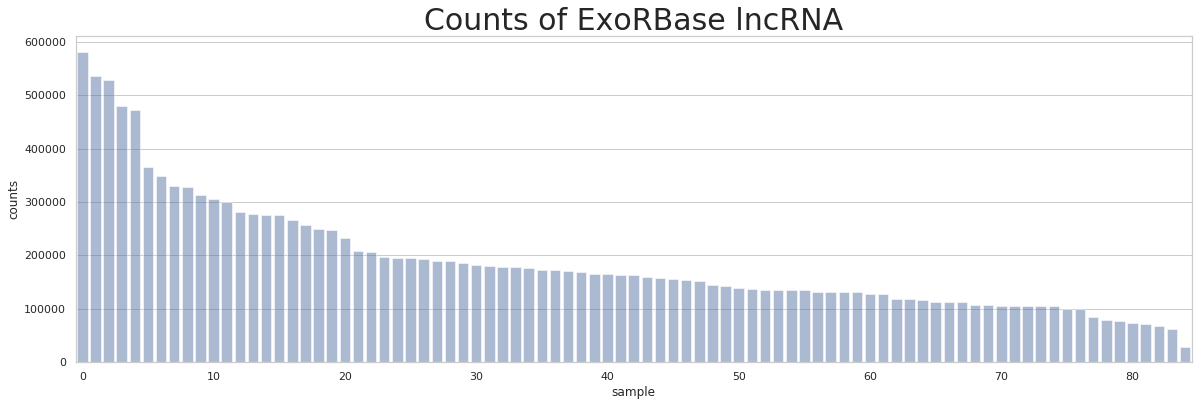

In [46]:
plot_bar('lncRNA',dataname ='exo')

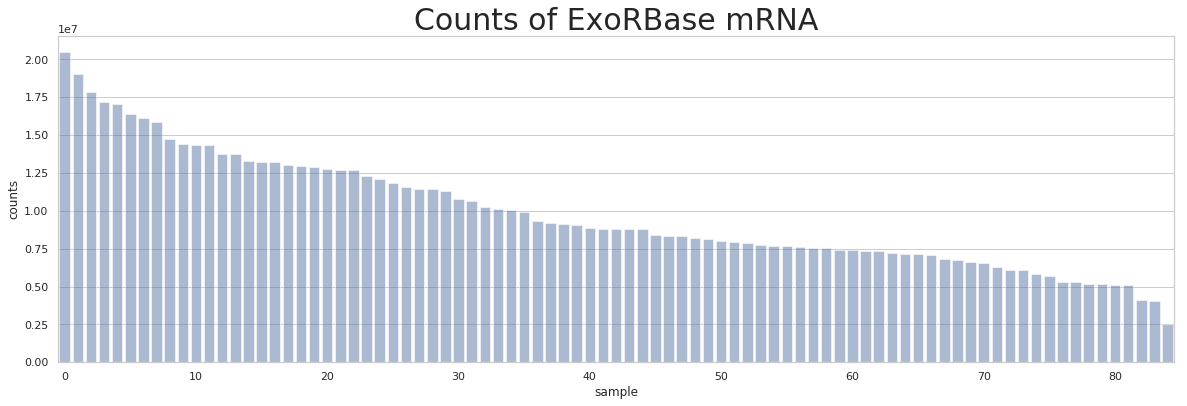

In [65]:
plot_bar('mRNA',dataname ='exo')

Text(0.5,1,'Stacked Bar plot of exoRBase RNAs')

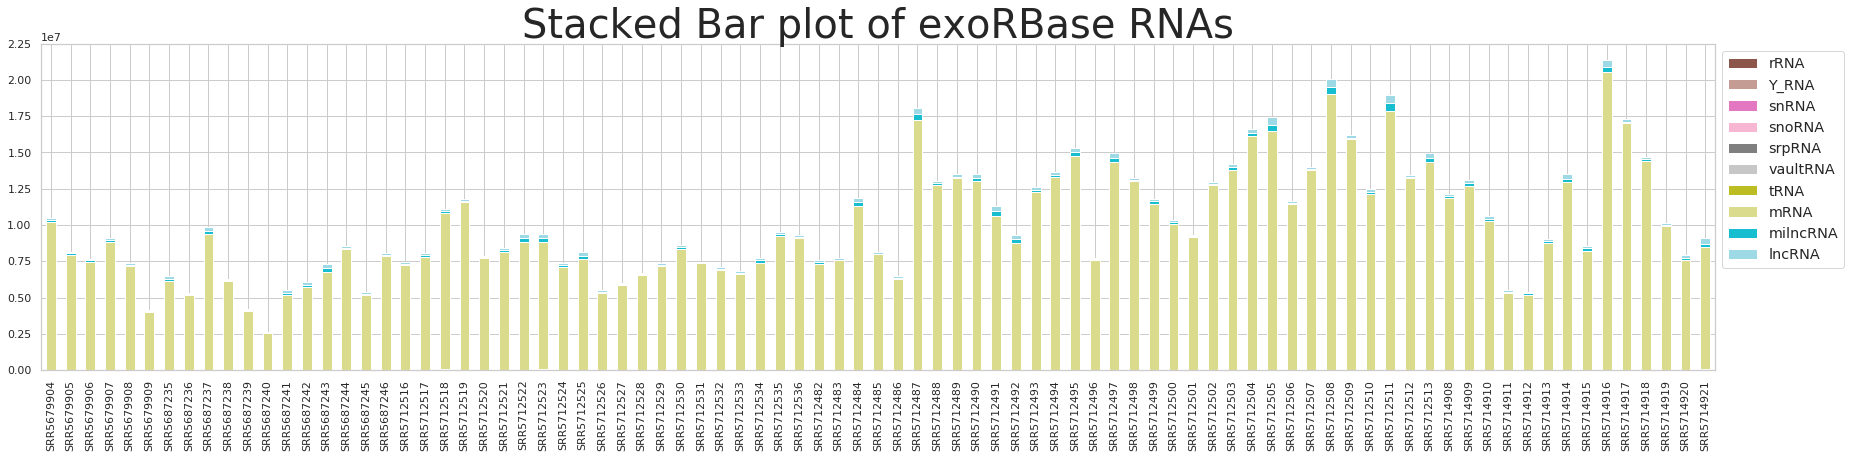

In [64]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
wholetable_sum.T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20[10:]))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of exoRBase RNAs',fontsize=40)

Text(0.5,1,'Stacked Bar plot of exoRBase RNAs')

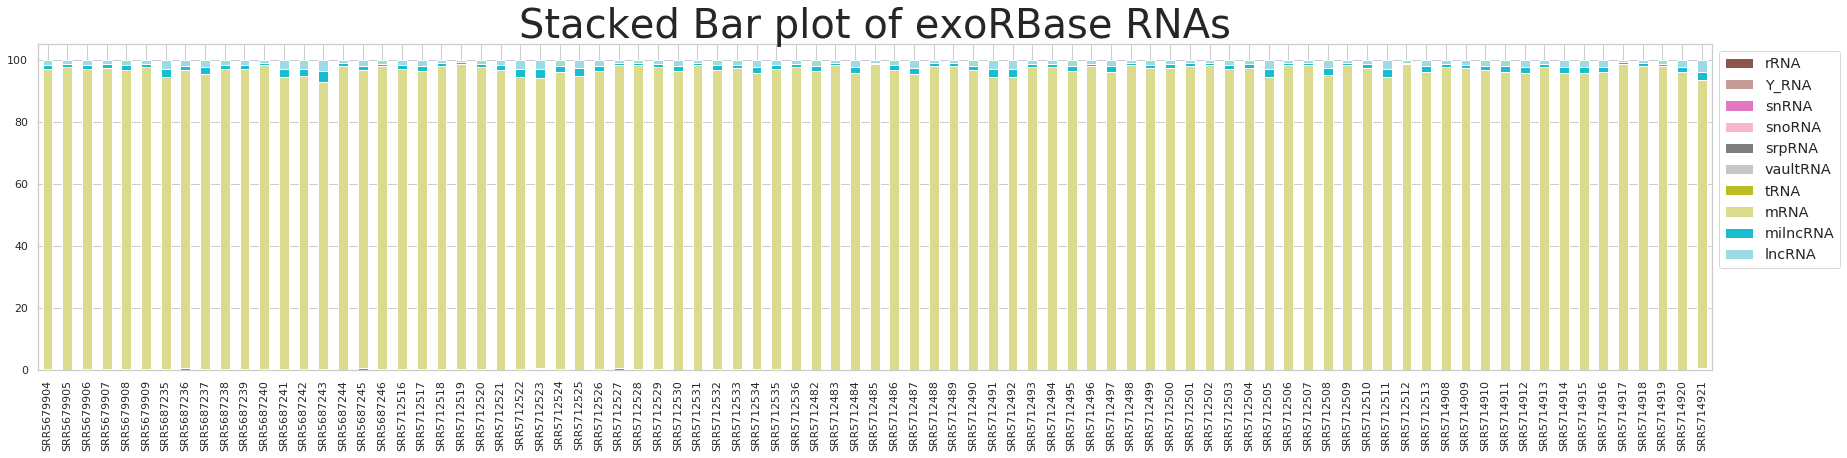

In [63]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
wholetable_ratio.T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20[10:]))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of exoRBase RNAs',fontsize=40)

## rename scirep

In [109]:
sample_classes = pd.read_table('/home/chenxupeng/projects/exRNA_binbin/metadata/sample_classes.GSE71008.txt', sep='\t', header=None,
                               names=['sample_id', 'label'], index_col=0).iloc[:, 0]
unique_classes = np.unique(sample_classes)
print('Unique classes: {}'.format(', '.join(unique_classes)))
sample_classes.head()

Unique classes: Colorectal Cancer, Healthy Control, Pancreatic Cancer, Prostate Cancer


sample_id
Sample_1S3     Colorectal Cancer
Sample_1S6     Colorectal Cancer
Sample_1S9     Colorectal Cancer
Sample_1S12    Colorectal Cancer
Sample_1S15    Colorectal Cancer
Name: label, dtype: object

In [113]:
pd.read_table('/home/chenxupeng/projects/exRNA_binbin/metadata/sample_classes.GSE71008.txt', sep='\t', header=None,
                               names=['sample_id', 'label'], index_col=0).drop(index=['Sample_4S8']).to_csv('data/labels/scirep_classes.txt')

In [116]:
ttt = pd.read_table('data/labels/scirep_classes.txt',delimiter=',')

In [121]:
pd.concat((ttt[ttt['label'] =='Colorectal Cancer'],
          ttt[ttt['label'] =='Healthy Control'])).to_csv('data/labels/scirep_binary_classes.txt')

In [44]:
m1 = pd.read_table('/home/chenxupeng/projects/exRNA_binbin/output/count_matrix/GSE71008_original.txt', sep='\t', index_col=0)
m2 = pd.read_csv('/home/chenxupeng/projects/training/data/gse_exp_ly.csv', index_col=0)
m1.columns = 'Sample_' + m1.columns

diff_matrix = np.zeros((m1.shape[1], m1.shape[1]), dtype=np.int32)
for i in range(m1.shape[1]):
    for j in range(m2.shape[1]):
        diff_matrix[i, j] = np.sum(np.abs(m1.iloc[:, i] - m2.iloc[:, j]))
sample_mappings = pd.DataFrame({
    'Sample1': m1.columns[:150].values,
    'Class1': sample_classes[m1.columns[:150]].values,
    'Sample2': m2.columns[np.argmin(diff_matrix, axis=1)[:150]].values,
    'Class2': sample_classes[m2.columns[np.argmin(diff_matrix, axis=1)[:150]]].values
}).reindex(columns=['Sample1', 'Class1', 'Sample2', 'Class2'])
sample_mappings.head(10)

,Sample1,Class1,Sample2,Class2
0,Sample_1S1,Colorectal Cancer,Sample_1S10,Colorectal Cancer
1,Sample_1S2,Colorectal Cancer,Sample_1S11,Colorectal Cancer
2,Sample_1S3,Colorectal Cancer,Sample_1S12,Colorectal Cancer
3,Sample_2S1,Colorectal Cancer,Sample_1S13,Colorectal Cancer
4,Sample_2S2,Colorectal Cancer,Sample_1S14,Colorectal Cancer
5,Sample_2S3,Colorectal Cancer,Sample_1S15,Colorectal Cancer
6,Sample_3S1,Colorectal Cancer,Sample_1S16,Colorectal Cancer
7,Sample_3S2,Colorectal Cancer,Sample_1S17,Colorectal Cancer
8,Sample_3S3,Colorectal Cancer,Sample_1S18,Colorectal Cancer
9,Sample_4S1,Colorectal Cancer,Sample_1S19,Colorectal Cancer


In [47]:
map_ids_1to2 = pd.Series(sample_mappings['Sample2'].values, index=sample_mappings['Sample1'].values)
map_ids_2to1 = pd.Series(sample_mappings['Sample1'].values, index=sample_mappings['Sample2'].values)

In [51]:
counts_original = pd.read_table('/home/chenxupeng/projects/exRNA_binbin/output/count_matrix/GSE71008_original.txt', sep='\t', index_col=0)
counts_original.columns = 'Sample_' + counts_original.columns
cpm_original = counts_original*1e6/counts_original.sum(axis=0)
cpm_original = cpm_original.loc[:, map_ids_1to2.index.values]

In [52]:
cpm = pd.read_table('/home/chenxupeng/projects/exRNA_binbin/output/cpm_matrix/GSE71008.txt', sep='\t', index_col=0)
cpm = cpm.loc[np.mean(np.isclose(cpm, 0), axis=1) < 0.8]
cpm = cpm.loc[:, map_ids_1to2.index.values]

In [88]:
countscirep = pd.read_table('/home/chenxupeng/projects/exRNA_binbin/output/count_matrix/GSE71008.txt', sep='\t', index_col=0)
#countscirep = countscirep.loc[np.mean(np.isclose(countscirep, 0), axis=1) < 0.8]
countscirep = countscirep.loc[:, map_ids_1to2.index.values]

In [89]:
countscirep = countscirep.drop(columns=['Sample_4S8'])

In [90]:
countscirep.to_csv('data/scirep_sequential_qc.txt')

Remove outlier samples with very large distance to other samples

In [55]:
mean_dist = pd.Series(np.mean(squareform(pdist(cpm.T)), axis=1), index=cpm.columns.values)
mean_dist = mean_dist.sort_values(ascending=False)
mean_dist.head()

Sample_4S8     169099.509859
Sample_3S12     99424.255967
Sample_PC4      97310.943548
Sample_4S3      86046.639915
Sample_4S17     78764.384723
dtype: float64

In [64]:
cpm = cpm.drop(columns=['Sample_4S8'])

In [80]:
cpm*cpm.sum(axis=0)/(10e6)

,Sample_1S1,Sample_1S2,Sample_1S3,Sample_2S1,Sample_2S2,Sample_2S3,Sample_3S1,Sample_3S2,Sample_3S3,Sample_4S1,...,Sample_PC29,Sample_PC30,Sample_N32,Sample_N34,Sample_1S19,Sample_2S19,Sample_2S20,Sample_2S21,Sample_3S19,Sample_3S20
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000484859.1|AL627309.5-201|8234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026010,0.024893,0.000000,0.000000,...,0.000000,0.028446,0.027204,0.072300,0.000000,0.032767,0.000000,0.000000,0.030944,0.000000
ENST00000591702.1|AL669831.5-218|1873,0.000000,0.029523,0.030141,0.000000,0.000000,0.066256,0.000000,0.000000,0.030814,0.026942,...,0.000000,0.000000,0.027204,0.144600,0.000000,0.032767,0.000000,0.000000,0.000000,0.000000
ENST00000445118.6|LINC01128-205|31839,0.000000,0.029523,0.000000,0.000000,0.093409,0.044170,0.052020,0.000000,0.061628,0.053884,...,0.000000,0.028446,0.000000,0.072300,0.000000,0.032767,0.000000,0.030742,0.000000,0.000000
ENST00000448179.1|AL645608.3-201|3514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052020,0.000000,0.030814,0.000000,...,0.000000,0.000000,0.027204,0.000000,0.030588,0.032767,0.000000,0.061484,0.030944,0.027340
ENST00000609207.1|AL645608.1-201|4152,0.000000,0.000000,0.030141,0.000000,0.031136,0.044170,0.026010,0.000000,0.000000,0.026942,...,0.034677,0.000000,0.081611,0.000000,0.000000,0.065535,0.000000,0.000000,0.030944,0.000000
ENST00000606034.1|AL645608.8-201|2086,0.032738,0.029523,0.000000,0.000000,0.000000,0.000000,0.026010,0.000000,0.000000,0.026942,...,0.000000,0.000000,0.000000,0.000000,0.030588,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000442292.2|AL645608.9-201|1081,0.000000,0.029523,0.030141,0.000000,0.093409,0.022085,0.000000,0.024893,0.000000,0.000000,...,0.034677,0.028446,0.027204,0.036150,0.030588,0.000000,0.057927,0.030742,0.000000,0.027340
ENST00000379317.1|TTLL10-AS1-201|6500,0.000000,0.088568,0.000000,0.031335,0.000000,0.022085,0.026010,0.000000,0.030814,0.000000,...,0.034677,0.000000,0.000000,0.000000,0.000000,0.032767,0.000000,0.000000,0.000000,0.000000
ENST00000565563.1|AL162741.1-201|1558,0.032738,0.029523,0.000000,0.125339,0.000000,0.022085,0.052020,0.000000,0.030814,0.026942,...,0.034677,0.000000,0.000000,0.000000,0.030588,0.032767,0.000000,0.000000,0.000000,0.000000


cpm.to_csv('data/cpm_sequential_scirep_qc.txt',sep='\t')

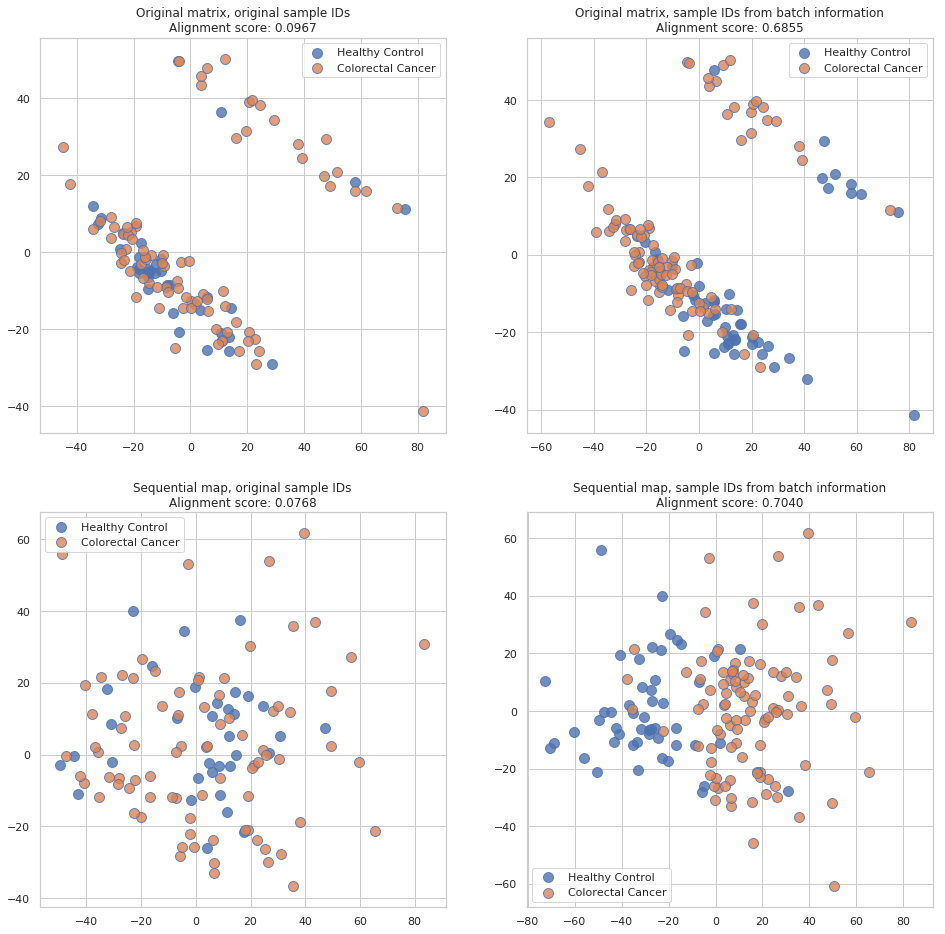

In [467]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
for i_mat in range(2):
    m = [cpm_original, cpm][i_mat]
    X = np.log2(m + 0.001).T
    #X = cpm_original.T.copy()
    X = StandardScaler().fit_transform(X)
    #pca = TSNE(2)
    pca = PCA()
    #pca.fit(X)
    X_pca = pca.fit_transform(X)
    for i_id in range(2):
        ax = axes[i_mat, i_id]
        sample_ids = [[cpm_original.columns.values, map_ids_1to2[cpm_original.columns.values]],
                      [cpm.columns.values, map_ids_1to2[cpm.columns.values]]
                     ][i_mat][i_id]
        for label in ['Healthy Control', 'Colorectal Cancer']:
            indices = np.nonzero(sample_classes[sample_ids] == label)[0]
            ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=100,alpha=0.8 ,edgecolors = 'b', label=label)
        ax.legend()
        title = [['Original matrix, original sample IDs', 'Original matrix, sample IDs from batch information'],
                 ['Sequential map, original sample IDs', 'Sequential map, sample IDs from batch information']
                ][i_mat][i_id]
        ax.set_title('{}\nAlignment score: {:.4f}'.format(title,
                        knn_score(X, sample_classes[sample_ids].values)))

In [18]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    print (same_class_fractions.shape,np.mean(same_class_fractions),K/N,neighbor_classes)
    return score
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

In [19]:
np.unique(samples_scirep[1],return_counts=True) 

(array(['Colorectal Cancer', 'Healthy Control', 'Pancreatic Cancer',
        'Prostate Cancer'], dtype=object), array([100,  50,   6,  36]))

In [20]:
scirepdata_cpm = scirepdata*10e6/scirepdata.sum(axis=0)

Alignment score: 0.5385094928148989


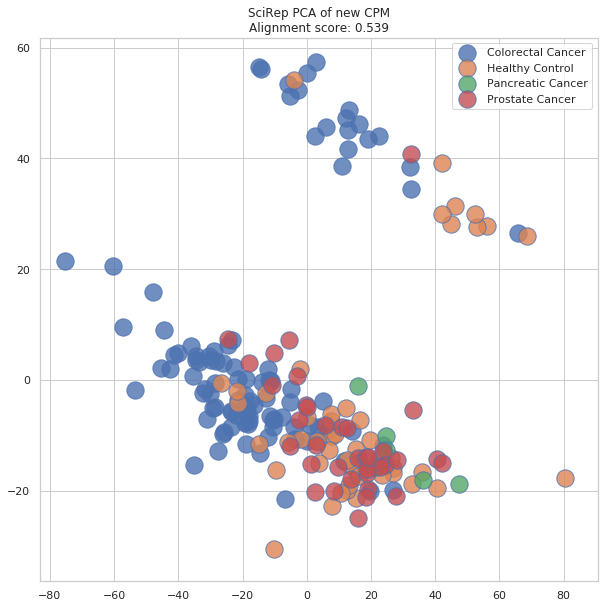

In [25]:
X = np.log2(scirepdata_cpm + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
for label, color in zip(['Colorectal Cancer', 'Healthy Control', 'Pancreatic Cancer',
       'Prostate Cancer'],tableau20[np.array([2,0,5,7])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(samples_scirep.loc[scirepdata_cpm.columns][1] == label)[0]
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax.legend()
ax.set_title('SciRep PCA of new CPM'+'\n'
            'Alignment score: {}'.format(np.round(knn_score(X_pca, 
           samples_scirep.loc[scirepdata_cpm.columns.values][1].values.ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, samples_scirep.loc[scirepdata_cpm.columns.values][1].values.ravel() )))

### 最终确定scirep
cpm: `data/scirep_sequential_qc.txt`     `/home/chenxupeng/projects/exRNA_binbin/metadata/sample_classes.GSE71008.txt'`

In [74]:
pd.read_table('/home/chenxupeng/projects/exRNA_binbin/metadata/sample_classes.GSE71008.txt')

,Sample_1S3,Colorectal Cancer
0,Sample_1S6,Colorectal Cancer
1,Sample_1S9,Colorectal Cancer
2,Sample_1S12,Colorectal Cancer
3,Sample_1S15,Colorectal Cancer
4,Sample_1S18,Colorectal Cancer
5,Sample_1S21,Colorectal Cancer
6,Sample_1S24,Colorectal Cancer
7,Sample_4S2,Colorectal Cancer
8,Sample_4S5,Colorectal Cancer
9,Sample_4S8,Colorectal Cancer


## exoRBase 合到一起

In [10]:
tables = ['chd','crc','hcc','health','paad']

In [11]:
def get_table(path):
    table = pd.read_table(path)
    return table

In [12]:
table = {}
for i in tables:
    table[i] = get_table('/BioII/lulab_b/caojingyi/project/exorbase/new_counts/matrix/'+i+'.count.name')

In [18]:
index_chd = table['chd'].index

In [22]:
wholetable = pd.concat((table['chd'].loc[index_chd],table['crc'].loc[index_chd],
          table['hcc'].loc[index_chd],table['health'].loc[index_chd],
          table['paad'].loc[index_chd]),axis=1)

In [24]:
badsample = ['SRR5679909','SRR5714919','SRR5714920','SRR5714921']

In [28]:
np.setdiff1d(wholetable.columns,badsample).shape

(81,)

In [30]:
wholetable.loc[:,np.setdiff1d(wholetable.columns,badsample)].head()

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5687235,SRR5687236,SRR5687237,SRR5687238,SRR5687239,...,SRR5714909,SRR5714910,SRR5714911,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918
lncRNA|ENSG00000243485.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lncRNA|ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lncRNA|ENSG00000238009.6,0,0,0,3,0,6,1,5,0,1,...,0,2,6,0,3,67,0,14,139,0
lncRNA|ENSG00000239945.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lncRNA|ENSG00000239906.1,0,0,1,31,3,0,3,0,5,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
wholetable_qc = wholetable.loc[:,np.setdiff1d(wholetable.columns,badsample)]

In [33]:
wholetable_qc.to_csv('data/exoRBase_remap.csv')

In [107]:
pd.read_csv('data/exoRBase_remap.csv',index_col=0).to_csv('data/expression_matrix/exoRBase.txt',sep='\t')

In [41]:
pd.read_table('data/GSE71008.txt',delimiter=',').shape

(3460, 193)

In [42]:
pd.read_table('/home/chenxupeng/projects/exRNA_binbin/output/count_matrix/GSE71008.txt').shape

(89619, 193)

In [104]:
exoRBase_count = pd.read_table('data/expression_matrix/exoRBase.txt',delimiter='\t')

In [102]:
ttt,tttt= np.unique(pd.read_table('data/expression_matrix/exoRBase.txt',delimiter='\t')['transcript'],
               return_counts=True)

In [103]:
ttt[np.where(tttt!=1)]

array(['ENST00000607781.1|RN7SL832P-201|1756'], dtype=object)

In [94]:
pd.read_table('data/expression_matrix/piranha_peaks_iterative.txt',delimiter='\t')

,peak,10515058-A,12402567-A,13515292-A,17402567-B,249136-B,333874-A,3497470-B,385247-A,385247-B,...,SRR3103252,SRR3103253,SRR3103254,SRR3103255,SRR3103256,SRR3103257,SRR3103258,SRR3103259,SRR3103260,SRR3103261
0,peak_1|12954|tRNA,63,76,18,153,26,25,28,20,18,...,0,2,1,4,1,1,0,6,2,0
1,peak_2|12956|tRNA,102,172,25,220,130,86,138,87,106,...,15,27,105,46,58,73,16,82,191,80
2,peak_3|12958|tRNA,32,41,20,67,35,38,33,39,33,...,0,0,4,4,4,4,4,8,6,10
3,peak_4|12962|tRNA,68,580,31,196,73,37,90,106,155,...,15,41,57,147,33,69,41,96,176,115
4,peak_5|12969|tRNA,49,77,48,35,51,25,23,85,123,...,12,54,69,14,113,33,41,167,75,57
5,peak_6|12979|tRNA,87,158,54,239,112,105,102,105,116,...,53,54,190,187,121,146,51,121,135,128
6,peak_7|12985|tRNA,197,156,136,264,218,112,273,146,111,...,35,180,848,374,482,838,237,647,1282,739
7,peak_8|12991|tRNA,245,148,124,225,215,101,250,118,119,...,42,170,818,348,469,928,239,665,1201,739
8,peak_9|12993|tRNA,313,429,170,826,486,455,526,329,394,...,94,127,360,290,149,248,99,258,293,255
9,peak_10|12999|tRNA,23,45,10,21,18,15,11,53,58,...,3,29,64,42,14,29,15,9,45,27


In [133]:
pd.read_csv('data/labels/sample_classes.exoRBase.txt',delimiter='\t',header=None,
                               names=['sample_id', 'label']).to_csv('data/labels/sample_classes.exoRBase.txt')

In [203]:
exorbasecount = pd.read_csv('data/expression_matrix/exoRBase.txt',sep='\t',index_col=0)

In [141]:
exorabseclass = pd.read_csv('data/labels/sample_classes.exoRBase.txt',sep=',')

In [149]:
exorabseclass.iloc[np.isin(exorabseclass['sample_id'] ,exorbase.columns[1:]),1:].to_csv('data/labels/sample_classes.exoRBase.txt')

In [154]:
hccclass = pd.read_csv('data/labels/sample_classes.piranha_peaks.txt',sep='\t',header=None,
                               names=['sample_id', 'label'])

In [165]:
hcccounts = pd.read_csv('data/expression_matrix/transcripts_exrna.txt',sep='\t',index_col=0)

In [169]:
hcccounts.loc[:,hccclass['sample_id']].to_csv('data/expression_matrix/transcripts_exrna_43.txt')

In [170]:
hccpeak = pd.read_csv('data/expression_matrix/piranha_peaks_iterative.txt',sep='\t',index_col=0)

In [171]:
hccpeak.loc[:,hccclass['sample_id']].to_csv('data/expression_matrix/piranha_peaks_iterative_43.txt')

In [173]:
hccclass.to_csv('data/labels/sample_classes.piranha_peaks.txt')

## 重做reference normalization

In [183]:
reference_transcript_id = np.array([
          'ENST00000385271.1|MIR16-1-201|89','ENST00000607334.3|MIR15A-201|83',
          'ENST00000385059.1|MIR451A-201|72','ENST00000362134.1|MIR21-201|72',
          'ENST00000385245.1|MIR23A-201|73','ENST00000362117.1|MIR16-2-201|81',
           'ENST00000384832.1|MIR23B-201|97','ENST00000579846.3|MIR23C-201|100'])
referencegene_peak = np.array(['peak_1193|MIR1228-201|miRNA','peak_665|MIR16-1-201|miRNA',
          'peak_1061|MIR16-1-201|miRNA','peak_1025|MIR15A-201|miRNA','peak_1804|MIR15A-201|miRNA',
          'peak_618|MIR451A-201|miRNA','peak_1002|MIR451A-201|miRNA','peak_655|MIR23A-201|miRNA',
          'peak_1049|MIR23A-201|miRNA','peak_609|MIR15B-201|miRNA',
          'peak_186|MIR16-2-201|miRNA','peak_402|MIR16-2-201|miRNA','peak_534|MIR23B-201|miRNA',
          'peak_898|MIR23B-201|miRNA'])

In [409]:
gsecount = pd.read_csv('data/expression_matrix/scirep_sequential_qc.txt',sep='\t',index_col=0)

In [191]:
hcccount =  pd.read_csv('data/expression_matrix/transcripts_exrna_43.txt',index_col=0)
hccpeakcount=  pd.read_csv('data/expression_matrix/piranha_peaks_iterative_43.txt',index_col=0)

In [411]:
gsecount_reference = gsecount.loc[reference_transcript_id]
hcccount_reference = hcccount.loc[reference_transcript_id]
hccpeakcount_reference = hccpeakcount.loc[referencegene_peak]
#gsecount_reference['transcript']  =  referencegenes
#gsecount_reference.index = gsecount_reference['transcript']
#gsecount_reference = gsecount_reference.iloc[:,1:]

In [412]:
def get_normalized_reference(table,table_reference):
     return table[table_reference.columns]*1e6/np.sum(table_reference,axis=0)

In [197]:
get_normalized_reference(hcccount,hcccount_reference).to_csv('data/normalization/reference.transcripts_exrna_43.txt')

In [198]:
get_normalized_reference(hccpeakcount,hccpeakcount_reference).to_csv(
    'data/normalization/reference.piranha_peaks_iterative_43.txt')

In [413]:
get_normalized_reference(gsecount,gsecount_reference).to_csv(
    'data/normalization/reference.scirep_sequential_qc.txt')

### 处理expression matrix的cpm

In [208]:
def get_normalized_cpm(table):
     return table*1e6/table.sum(axis=0)

In [210]:
get_normalized_cpm(exorbasecount).to_csv('data/cpm/exoRBase_cpm.txt')

In [211]:
get_normalized_cpm(hcccount).to_csv('data/cpm/transcripts_exrna_43_cpm.txt')

In [212]:
get_normalized_cpm(hccpeakcount).to_csv('data/cpm/piranha_peaks_iterative_43_cpm.txt')

In [213]:
get_normalized_cpm(gsecount).to_csv('data/cpm/scirep_sequential_qc_cpm.txt')

### batch

In [254]:
sample_mappings.index = sample_mappings['Sample1']

In [258]:
batchscirep = pd.read_csv('data/GSE_sample_batch_whole.csv',index_col=1).iloc[:,1:]

In [259]:
batchscirep.index = np.array(['Sample_'+batchscirep.index[i] for i in range(batchscirep.shape[0])])

In [266]:
pd.concat((sample_mappings.loc[batchscirep.index],batchscirep),axis=1).iloc[:,2:].head()

,Sample2,Class2,RNA Isolation batch,library prepration day,gel cut size selection
Sample_1S1,Sample_1S10,Colorectal Cancer,2,22,7
Sample_1S2,Sample_1S11,Colorectal Cancer,2,22,8
Sample_1S3,Sample_1S12,Colorectal Cancer,2,22,1
Sample_2S1,Sample_1S13,Colorectal Cancer,2,22,2
Sample_2S2,Sample_1S14,Colorectal Cancer,2,22,3


In [272]:
pd.concat((sample_mappings.loc[batchscirep.index],batchscirep),axis=1).iloc[:150,2:].drop(index=['Sample_4S8']).to_csv('data/batch_effect/scirep_batch_info_renameid.txt')

In [278]:
np.isnan(pd.read_csv('data/cpm/cpm.scirep_sequential_qc.txt',index_col=0)).sum()

Sample_1S1      0
Sample_1S2      0
Sample_1S3      0
Sample_2S1      0
Sample_2S2      0
Sample_2S3      0
Sample_3S1      0
Sample_3S2      0
Sample_3S3      0
Sample_4S1      0
Sample_4S2      0
Sample_4S3      0
Sample_PC1      0
Sample_PC2      0
Sample_PC3      0
Sample_PC4      0
Sample_PC5      0
Sample_PC6      0
Sample_N1       0
Sample_N2       0
Sample_N3       0
Sample_N4       0
Sample_N5       0
Sample_N6       0
Sample_1S4      0
Sample_1S5      0
Sample_2S4      0
Sample_2S5      0
Sample_2S6      0
Sample_3S4      0
               ..
Sample_Pan05    0
Sample_Pan06    0
Sample_1S12     0
Sample_N20      0
Sample_2S13     0
Sample_2S14     0
Sample_4S15     0
Sample_PC21     0
Sample_N26      0
Sample_N27      0
Sample_1S18     0
Sample_2S16     0
Sample_2S17     0
Sample_2S18     0
Sample_3S16     0
Sample_3S17     0
Sample_4S17     0
Sample_4S18     0
Sample_PC27     0
Sample_PC28     0
Sample_PC29     0
Sample_PC30     0
Sample_N32      0
Sample_N34      0
Sample_1S1

In [282]:
pd.read_csv('data/batch_effect/GSE_binary_batch_combat_batch1.csv',index_col=0).drop(columns=['Sample_4S8'])

,Sample_1S3,Sample_1S6,Sample_1S9,Sample_1S12,Sample_1S15,Sample_1S18,Sample_1S21,Sample_1S24,Sample_4S2,Sample_4S5,...,Sample_N6,Sample_N12,Sample_N18,Sample_N24,Sample_N30,Sample_N36,Sample_N42,Sample_N48,Sample_N50,Sample_N49
ENST00000484859.1|AL627309.5-201|8234,-0.012673,-0.001919,-0.008903,0.045909,0.046496,0.002840,-0.018485,-0.030263,1.937410,0.864704,...,-0.012673,-0.001919,0.991808,0.969544,0.046496,0.002840,-0.018485,-0.030263,0.002840,-0.005015
ENST00000591702.1|AL669831.5-218|1873,0.875037,1.080320,0.102057,0.717381,0.043455,0.891241,1.483001,-0.030961,1.404756,1.544160,...,-0.022582,-0.014005,0.102057,-0.072689,0.043455,-0.016916,0.116285,1.123047,0.823126,0.102039
ENST00000445118.6|LINC01128-205|31839,0.011046,0.113520,0.062061,-0.007093,1.217745,0.856887,1.085184,0.106011,0.011046,0.113520,...,0.011046,0.113520,0.062061,0.943594,1.110623,-0.141080,0.963332,1.412998,-0.141080,0.061742
ENST00000448179.1|AL645608.3-201|3514,0.017722,0.094671,0.039524,0.031307,-0.026332,1.184195,0.019044,-0.134602,0.017722,0.094671,...,0.017722,0.094671,2.091139,1.002539,-0.026332,0.039415,0.019044,1.030229,0.039415,0.870564
ENST00000609207.1|AL645608.1-201|4152,0.796826,0.039109,1.045322,-0.005104,1.393185,1.002999,-0.031465,1.215505,-0.000125,0.997821,...,1.938028,0.039109,1.672128,-0.005104,0.063107,0.996263,-0.031465,0.068766,0.922235,0.037913
ENST00000442292.2|AL645608.9-201|1081,0.925014,2.357939,0.951965,1.317429,1.273441,-0.093639,-0.041729,0.010037,1.826512,1.284080,...,0.048059,1.310691,0.966850,0.081077,0.092509,-0.093639,-0.041729,0.010037,0.914353,0.916106
ENST00000565563.1|AL162741.1-201|1558,0.007988,0.020660,-0.043913,0.147235,1.228612,-0.050962,0.027796,0.056220,0.808195,0.020660,...,0.007988,1.019861,-0.043913,0.147235,-0.004530,-0.050962,0.027796,0.056220,-0.050962,-0.043872
ENST00000607307.1|AL391244.3-201|1523,-0.017462,-0.043871,0.042025,-0.031683,0.029499,0.053349,0.030706,0.022353,1.524269,1.339058,...,0.819188,-0.043871,0.042025,-0.031683,0.029499,0.053349,0.030706,0.022353,0.053349,0.035983
ENST00000366221.3|AL645728.1-201|2101,-0.034683,0.003745,-0.057467,0.745248,0.074147,0.095139,-0.029705,0.021591,-0.034683,0.003745,...,0.765790,0.003745,0.950179,-0.010546,1.058517,0.095139,-0.029705,0.021591,0.095139,-0.054932
ENST00000598846.1|AL031282.2-201|34953,2.580949,3.062244,2.559123,2.788127,3.090948,1.919659,1.879744,2.127180,3.063607,3.257276,...,2.975381,2.893554,3.620773,2.880177,1.232777,1.292205,3.358700,2.594631,3.717238,2.973139


In [283]:
ls data/cpm

cpm.exoRBase.txt                    cpm.scirep_sequential_qc.txt
cpm.piranha_peaks_iterative_43.txt  cpm.transcripts_exrna_43.txt


In [ ]:
# delete rows variance =0

In [301]:
def delete_variance_zero(filename,savename):
    tttt = pd.read_csv(filename,index_col=0)
    tttt.iloc[np.where(np.var(tttt,axis=1)!=0)].to_csv(savename,sep='\t')

In [310]:
delete_variance_zero('data/cpm/cpm.scirep_sequential_qc.txt','data/cpm/cpm.scirep_sequential_qc_variance.txt')

In [312]:
pd.read_csv('data/batch_effect/combat.scirep_sequential_qc_variance.txt',index_col=0,delimiter='\t')

,Sample_1S1,Sample_1S2,Sample_1S3,Sample_2S1,Sample_2S2,Sample_2S3,Sample_3S1,Sample_3S2,Sample_3S3,Sample_4S1,...,Sample_PC29,Sample_PC30,Sample_N32,Sample_N34,Sample_1S19,Sample_2S19,Sample_2S20,Sample_2S21,Sample_3S19,Sample_3S20
ENST00000473358.1|MIR1302-2HG-202|1544,0.001586,0.001586,0.001586,0.001586,0.001586,0.001586,0.001586,0.001586,0.001586,0.001586,...,0.002096,0.002096,0.002096,0.002096,0.001940,0.001940,0.001940,0.001940,0.001940,0.001940
ENST00000469289.1|MIR1302-2HG-201|843,0.001067,0.001067,0.001067,0.001067,0.001067,0.001067,0.001067,0.001067,0.001067,0.001067,...,0.001411,0.001411,0.001411,0.001411,0.001306,0.001306,0.001306,0.001306,0.001306,0.001306
ENST00000466430.5|AL627309.1-201|31638,-0.000750,-0.000750,-0.000750,0.280224,-0.000750,-0.000750,-0.000750,-0.000750,-0.000750,-0.000750,...,0.009098,0.009098,0.009098,0.009098,0.007862,0.007862,0.007862,0.007862,0.007862,0.007862
ENST00000471248.1|AL627309.1-203|18221,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,...,0.009212,0.009212,0.009212,0.009212,0.007842,0.007842,0.007842,0.007842,0.007842,0.007842
ENST00000610542.1|AL627309.1-205|12999,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,-0.001236,...,0.001257,0.001257,0.001257,0.001257,0.005709,0.005709,0.005709,0.005709,0.005709,0.074052
ENST00000493797.1|AL627309.2-201|550,0.000795,0.000795,0.000795,0.000795,0.000795,0.000795,0.000795,0.000795,0.000795,0.000795,...,0.001708,0.001708,0.001708,0.001708,0.001722,0.001722,0.001722,0.001722,0.001722,0.001722
ENST00000484859.1|AL627309.5-201|8234,0.001184,0.001184,0.001184,0.001184,0.001184,0.001184,0.366617,0.350613,0.001184,0.001184,...,-0.015206,0.375548,0.358615,0.978601,-0.040796,0.486648,-0.040796,-0.040796,0.456817,-0.040796
ENST00000466557.6|AL627309.5-203|27477,-0.003083,-0.003083,-0.003083,0.199694,-0.003083,-0.003083,-0.003083,-0.003083,-0.003083,0.171280,...,0.002579,0.002579,0.002579,0.002579,0.014828,0.014828,0.014828,0.014828,0.014828,0.014828
ENST00000491962.1|AL627309.5-204|2879,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,0.002128,...,0.001978,0.001978,0.001978,0.001978,0.001664,0.001664,0.001664,0.001664,0.001664,0.001664
ENST00000496488.1|AL627309.4-201|1080,0.002560,0.002560,0.002560,0.002560,0.002560,0.002560,0.002560,0.002560,0.002560,0.002560,...,0.007370,0.007370,0.007370,0.007370,0.005976,0.005976,0.005976,0.005976,0.005976,0.005976


In [354]:
hccbatch = pd.read_table('data/batch_effect/hcc_batch_info.txt',delimiter='\t',index_col=0)

In [373]:
pd.Categorical(hccbatch.loc[hcccount.columns]['Batch'])

[8th_201804, 7th_201803, 4th_201801, 2nd_201712, 1st_201711, ..., 8th_201804, 8th_201804, 9th_201804, 9th_201804, 9th_201804]
Length: 43
Categories (8, object): [1st_201711, 2nd_201712, 3nd_201801, 4th_201801, 6th_201803, 7th_201803, 8th_201804, 9th_201804]

In [371]:
pd.Categorical?

In [377]:
hccbatch_digits= np.repeat(1,hccbatch.shape[0])

In [399]:
hccbatch_digits[hccbatch['Batch']=='1st_201711'] =3
hccbatch_digits[hccbatch['Batch']=='2nd_201712'] =3
hccbatch_digits[hccbatch['Batch']=='3nd_201801'] =4
hccbatch_digits[hccbatch['Batch']=='4th_201801'] =4
hccbatch_digits[hccbatch['Batch']=='6th_201803'] =7
hccbatch_digits[hccbatch['Batch']=='7th_201803'] =7
hccbatch_digits[hccbatch['Batch']=='8th_201804'] =8

In [400]:
np.unique(hccbatch_digits,return_counts=True)

(array([1, 3, 4, 7, 8]), array([ 4,  9, 11, 26, 14]))

In [401]:
hccbatch['batch_digits'] = hccbatch_digits

In [402]:
hccbatch.loc[hcccount.columns].to_csv('data/batch_effect/hcc_batch_info.txt',sep='\t')

In [405]:
np.unique(hccbatch['batch_digits'],return_counts=True)

(array([1, 3, 4, 7, 8]), array([ 4,  9, 11, 26, 14]))

In [448]:
scirep = pd.read_csv('data/expression_matrix/scirep_sequential_qc.txt',sep='\t',index_col=0)

In [438]:
scirepcpm = pd.read_csv('data/cpm/cpm.scirep_sequential_qc.txt',sep='\t',index_col=0)

In [442]:
scirepcpm.columns

Index(['Sample_1S10', 'Sample_1S11', 'Sample_1S12', 'Sample_1S13',
       'Sample_1S14', 'Sample_1S15', 'Sample_1S16', 'Sample_1S17',
       'Sample_1S18', 'Sample_1S19',
       ...
       'Sample_N47', 'Sample_N48', 'Sample_N49', 'Sample_N4', 'Sample_N50',
       'Sample_N5', 'Sample_N6', 'Sample_N7', 'Sample_N8', 'Sample_N9'],
      dtype='object', length=149)

In [433]:
scirepcpm.drop(columns=['Sample_4S8']).to_csv('data/cpm/cpm.scirep_sequential_qc.txt',sep='\t')

In [454]:
scirep.loc[:,scirepcpm.columns].to_csv('data/expression_matrix/scirep_sequential_qc.txt',sep='\t')

In [436]:
scirepcpm.drop(columns=['Sample_4S8']).columns[1:]

Index(['Sample_1S10', 'Sample_1S11', 'Sample_1S12', 'Sample_1S13',
       'Sample_1S14', 'Sample_1S15', 'Sample_1S16', 'Sample_1S17',
       'Sample_1S18', 'Sample_1S19',
       ...
       'Sample_N47', 'Sample_N48', 'Sample_N49', 'Sample_N4', 'Sample_N50',
       'Sample_N5', 'Sample_N6', 'Sample_N7', 'Sample_N8', 'Sample_N9'],
      dtype='object', length=148)

In [437]:
scirepcpm

,transcript,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,...,Sample_N47,Sample_N48,Sample_N49,Sample_N4,Sample_N50,Sample_N5,Sample_N6,Sample_N7,Sample_N8,Sample_N9
0,ENST00000473358.1|MIR1302-2HG-202|1544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENST00000469289.1|MIR1302-2HG-201|843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENST00000466430.5|AL627309.1-201|31638,0.000000,0.000000,0.000000,0.313656,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENST00000471248.1|AL627309.1-203|18221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENST00000610542.1|AL627309.1-205|12999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273599
5,ENST00000493797.1|AL627309.2-201|550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ENST00000484859.1|AL627309.5-201|8234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260579,0.249167,0.000000,...,0.000000,0.284621,0.272287,0.723877,0.000000,0.328204,0.000000,0.000000,0.309642,0.000000
7,ENST00000466557.6|AL627309.5-203|27477,0.000000,0.000000,0.000000,0.313656,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,ENST00000491962.1|AL627309.5-204|2879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,ENST00000496488.1|AL627309.4-201|1080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [458]:
pd.read_csv('data/batch_effect/scirep_batch_info_renameid.txt',sep='\t',
            index_col=0).drop(index=['Sample_4S8']).to_csv('data/batch_effect/scirep_batch_info_renameid.txt')

In [464]:
delete_variance_zero('data/cpm/cpm.scirep_sequential_qc.txt','data/cpm/cpm.scirep_sequential_qc_variance.txt')

In [463]:
def delete_variance_zero(filename,savename):
    tttt = pd.read_csv(filename,sep='\t',index_col=0)
    tttt.iloc[np.where(np.var(tttt,axis=1)!=0)].to_csv(savename,sep='\t')

### 对RUVs和combat，对cpm做log，然后做完之后再变回来

In [482]:
cpmfiles =['cpm.scirep_sequential_qc_variance.txt','cpm.exoRBase_variance.txt',
         'cpm.transcripts_exrna_43_variance.txt','cpm.piranha_peaks_iterative_43_variance.txt']

In [495]:
def turn_to_log(file):
    table = pd.read_csv('data/cpm/'+file,sep='\t',index_col=0)
    np.log2(table+0.001).to_csv('data/cpm/logged.'+file)

In [485]:
turn_to_log(cpmfiles[1])

In [486]:
turn_to_log(cpmfiles[2])

In [487]:
turn_to_log(cpmfiles[3])

In [497]:
loggedfile = ['logged.combat.transcripts_exrna_43_variance.txt',
 'logged.ruvs.scirep_sequential_qc_variance.txt',
 'logged.combat.batch_3.scirep_sequential_qc_variance.txt',
 'logged.combat.batch_1.scirep_sequential_qc_variance.txt',
 'logged.ruvs.transcripts_exrna_43_variance.txt',
 'logged.ruvs.exoRBase_variance.txt',
 'logged.combat.piranha_peaks_iterative_43_variance.txt',
 'logged.combat.batch_2.scirep_sequential_qc_variance.txt',
'logged.ruvs.piranha_peaks_iterative_43_variance.txt']

In [511]:
def turn_to_exp(file):
    table = pd.read_csv('data/batch_effect/'+file,sep='\t',index_col=0)
    table_ = (np.exp(table)-0.001)
    table_[table_<0]=0
    table_.to_csv('data/batch_effect/reversed.'+file,sep='\t')

In [512]:
from tqdm import tqdm_notebook as tqdm

In [513]:
for i in tqdm(range(len(loggedfile))):
    turn_to_exp(loggedfile[i])

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

In [505]:
table = pd.read_csv('data/batch_effect/logged.combat.transcripts_exrna_43_variance.txt',sep='\t',index_col=0)